<a href="https://colab.research.google.com/github/mo-alrz/Machine-learning/blob/main/Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The dataset

We will work with the somewhat misleadingly named "Adult Data Set" from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult). The data is in the file "adult.csv".

**General info**
> Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.


**Field info**
> age: continuous.

> workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

> fnlwgt: continuous.

> education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters,
1st-4th, 10th, Doctorate, 5th-6th, Preschool.

> education-num: continuous.

>marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

>occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,
Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

>relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

> race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

> sex: Female, Male.

> capital-gain: continuous.

> capital-loss: continuous.

> hours-per-week: continuous.

> native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


# Loading and exploring the data



In [1]:
!wget "https://drive.google.com/uc?export=download&id=1NTDeOe8KJnXy6OVfBjpiJoZzdjtM5Hvi" -O adult.csv

--2023-12-26 16:51:50--  https://drive.google.com/uc?export=download&id=1NTDeOe8KJnXy6OVfBjpiJoZzdjtM5Hvi
Resolving drive.google.com (drive.google.com)... 74.125.195.113, 74.125.195.101, 74.125.195.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rqtv2lcerspuktljnjhk0os8v6go7mcq/1703609475000/07111638629254909344/*/1NTDeOe8KJnXy6OVfBjpiJoZzdjtM5Hvi?e=download&uuid=e3830c3e-bf5d-4566-86d9-62d39e17d895 [following]
--2023-12-26 16:51:52--  https://doc-0g-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rqtv2lcerspuktljnjhk0os8v6go7mcq/1703609475000/07111638629254909344/*/1NTDeOe8KJnXy6OVfBjpiJoZzdjtM5Hvi?e=download&uuid=e3830c3e-bf5d-4566-86d9-62d39e17d895
Resolving doc-0g-bk-docs.googleusercontent.com (doc-0g-bk-docs.googleusercontent.com)... 74.125.197.132, 2607:

In [2]:
import pandas as pd

df = pd.read_csv("adult.csv")

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Task

array([[<Axes: title={'center': 'age'}>]], dtype=object)

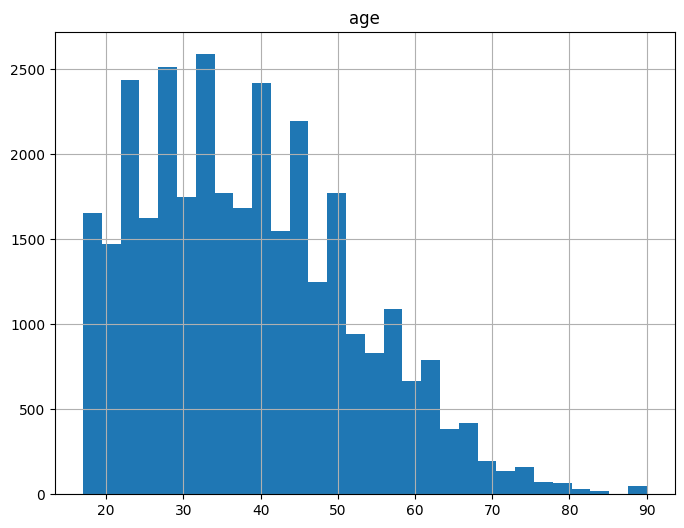

In [4]:
# implement a histogram of the age variable with 30 bins for exploration
df.hist(["age"], bins=30, figsize=(8, 6))

## Task

array([[<Axes: title={'center': 'capital_gain'}>,
        <Axes: title={'center': 'capital_loss'}>]], dtype=object)

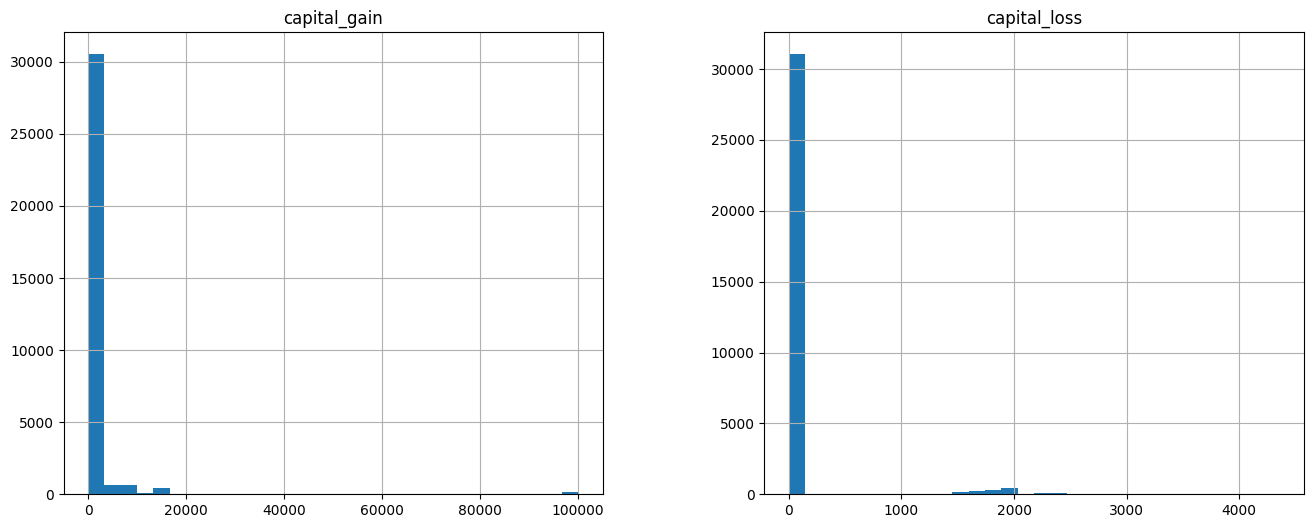

In [7]:
# implement a histogram of the capital_gain and capital_loss variables with 30 bins for exploration
df.hist(["capital_gain", "capital_loss"], bins=30, figsize=(16, 6))

## Task

Let us clarify the relationship between the education_num and education colums.

In [13]:
# Try to find the relationship between the eduction and education_num variables
# do a sorted and de-duplicated printout of a subset dataframe with the education and education_num
# and observe the relationship between the values.
# Is there a systematic mapping?
# Take the DataFrame, subset it by columns, look into drop_duplicates and sort_values functions!
# Bear in mind that these functions can be chained with . syntax

df[['education','education_num']].drop_duplicates().sort_values('education_num')

,education,education_num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


Conclusion: the education_num column is a good linear scale encoding of the education columm, so we can get rid of the latter.

## Task

We can also drop the (for us) useless "fnlwgt" column.

In [15]:
# get rid of the "fnlwgt", "education" columns, since we will not need them
# drop the columns by name

df.drop(columns=["fnlwgt", "education"],inplace=True)

# let's see!
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Task

We can encode the binary category values as binary codes.

In [17]:
# use the replace method of pandas to change the encoding
# of male and female in the sex column to 1 for female and 0 for male

df.sex.replace({'Male':0,'Female':1},inplace=True)

# do the same binary encoding for the income column with >50K and <=50K to 1 and 0
# please encode >50K as 1 and <=50K as 0, and ensure that the resulting column consists
# exclusively of integers (!)

df.income.replace({'>50K':1,'<=50K':0},inplace=True)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,United-States,0


In [ ]:
df.describe()

,age,education_num,sex,capital_gain,capital_loss,hours_per_week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,0.330795,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


# Clustering

## Task: K-means

We try to cluster the data using the age and education_num columns.

In [21]:
from sklearn import cluster
# initialze a KMeans object with 2 clusters
kmeans = cluster.KMeans(n_clusters=2)

# put the predictions of the kmeans clustering based on "age" and "education_num"
# (we use these two numerical features for easy 2d visualization)
# into a new column of the df; don't do it in separate steps, only one go!
df["kmeans_pred"] = kmeans.fit_predict(df[['age','education_num']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Task

The result can be visualised, e.g., with a scatter plot:

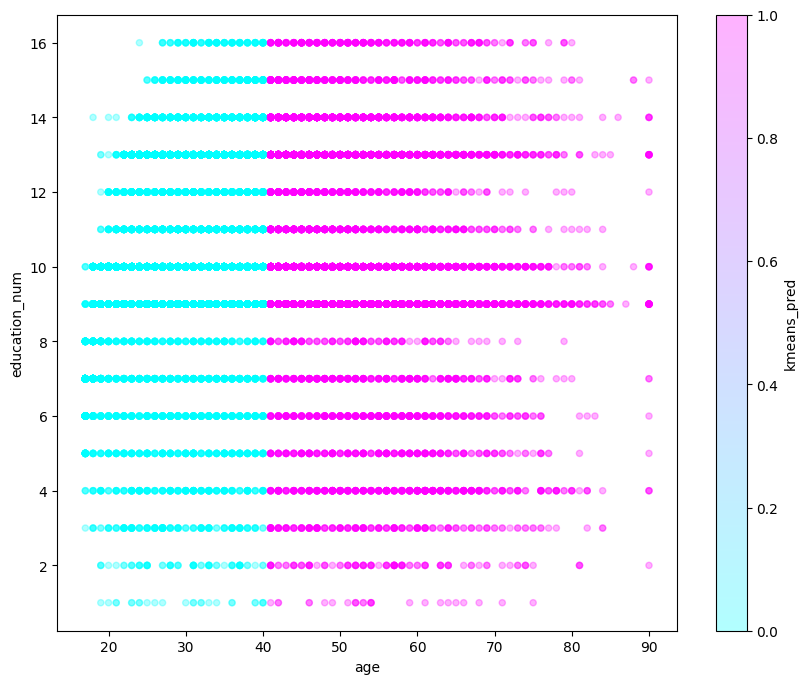

In [22]:
from matplotlib import pylab # we use this for nice coloring - optional cmap

# do a scatter plot for "age", "education_num", c="kmeans_pred"
# replace the ... part, please!
df.plot.scatter('age','education_num',c='kmeans_pred' , cmap=pylab.cm.cool, figsize=(10,8),
                alpha=0.3, # show overlap
                sharex=False);  # sharex=False is apparently needed because of a bug which causes the xaxis
                                # ticks to disappear when the colormap is shown

## Task

Let's try the same but with standardizing the variables first.
Standardizing means putting different variables on the same scale.
Now we should not do it "by hand", but use the standard scaler of Scikit.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='age', ylabel='education_num'>

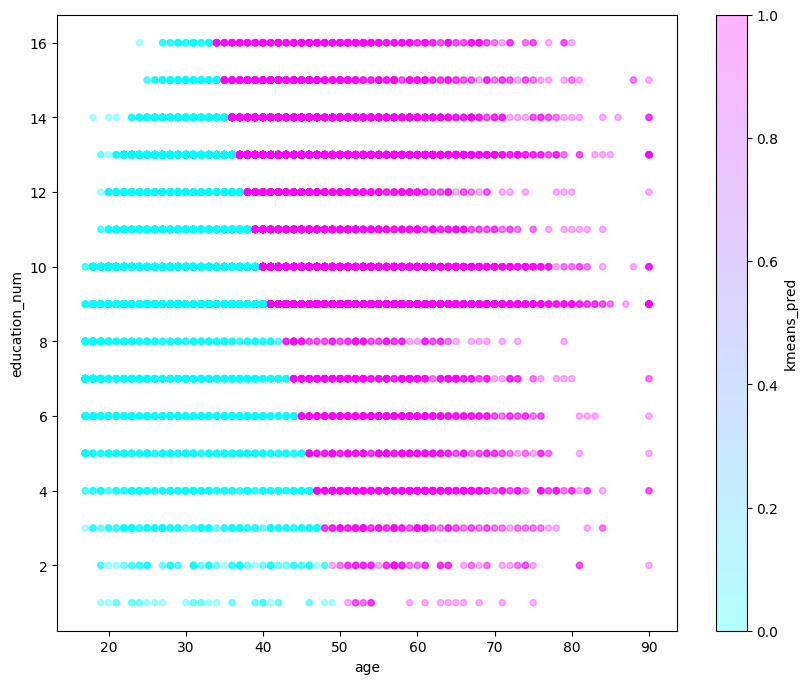

In [27]:

# import an appropriate standard scaler class from Scikit
from sklearn.preprocessing import StandardScaler

# Instantiate a scaler object
scaler = StandardScaler()


# use the object to standardize the age and education columns of the df
# and save the results to a new variable "standardized" in only one go!
standardized = scaler.fit_transform(df[['age','education_num']])

#fit a kmeans clustering on the new, standardized values, and put the predictions into a new column of the df
df['kmeans_pred'] = kmeans.fit_predict(standardized)

#let's see the result on a scatterplot!
df.plot.scatter('age','education_num',c='kmeans_pred' , cmap=pylab.cm.cool, figsize=(10,8),
                alpha=0.3, # show overlap
                sharex=False)

Observe the effect of standardization on the clustering!
Let's discuss why!

A visualisation of the "real" class labels in the same space.
Observe the same pattern!

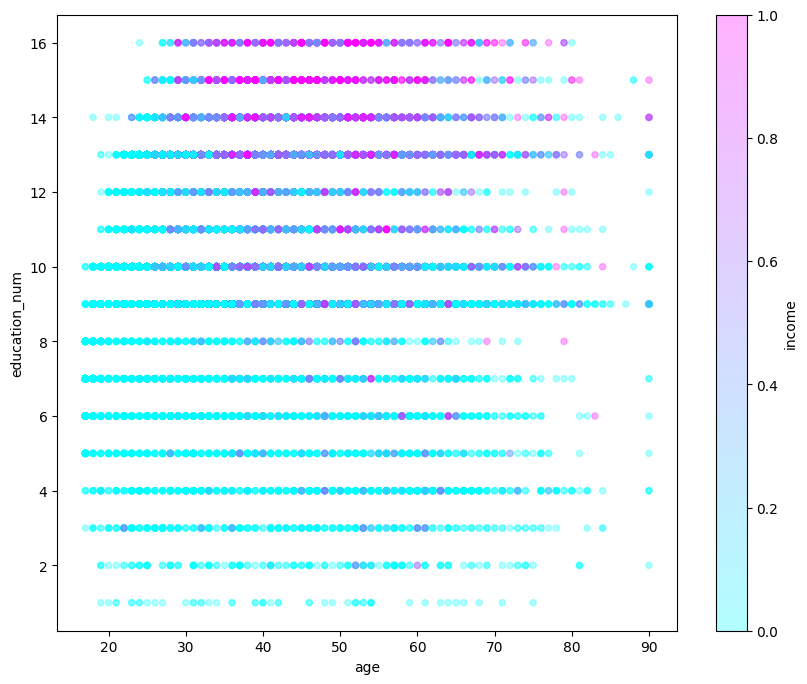

In [28]:
df.plot.scatter("age", "education_num", c="income", cmap=pylab.cm.cool, figsize=(10,8),
                    alpha=0.3, # show overlap
                    sharex=False);   # sharex=False is apparently needed because of a bug which causes the xaxis
                                    # ticks to disappear when the colormap is shown

## Task

It is an interesting question what are the precision etc. scores of this clustering with respect to our original class labels as if it were a classification task. Please print out the metrics!

> Note: only do this task if you turned `income` into a binary variable under "Loading and exploring the data"!

In [29]:
## to make sure the cluster labels are aligned with the class labels -- you don't have to do anything, just run the code.

tmp = df[["kmeans_pred", "income", ]].value_counts()
tmp = tmp[~tmp.index.get_level_values(1).duplicated(keep="first")]
most_common_pairs = tmp.iloc[:2]
display(most_common_pairs)
## create a most probable kmeans cluster number : category number dictionary
c_dict = dict(most_common_pairs.index.tolist())
## turn cluster numbers to category numbers
df["kmeans_pred"] = df["kmeans_pred"].map(lambda x: c_dict[x])

kmeans_pred  income
0            0         15622
1            1          5485
dtype: int64

In [32]:
from sklearn import metrics

# print out the appropriate metrics imported from Scikit
print("Precision:", metrics.precision_score(df.income,df.kmeans_pred))
print("Recall:", metrics.recall_score(df.income,df.kmeans_pred))
print("F-measure:", metrics.f1_score(df.income,df.kmeans_pred))

Precision: 0.3761228828087499
Recall: 0.6995281214130851
F-measure: 0.4892079914377452
